In [2]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd
import  numpy as np
from PIL import Image
import requests
import re

In [3]:
df = pd.read_csv('commen_sense.csv', encoding ="utf-8")

In [4]:
comment_words = '' 
stopwords = set(STOPWORDS)

In [13]:
def word_cloud(corpus):
    comment_words = '' 

    for val in corpus:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            # convert each token into lowercase
            tokens[i] = tokens[i].lower()
            # remove characters which are not alphabets
            tokens[i] = re.sub('[^a-z]', '', tokens[i])
            # remove links
            tokens[i] = re.sub('http', '', tokens[i])
            # remove tokens not a word
            tokens[i] = re.sub('\W+', '', tokens[i])

            # remove if the token is a stopword
            if not tokens[i] in stopwords:
                comment_words += tokens[i]+" "            
        # comment_words += " ".join(tokens)+" "
    return comment_words

def draw_word_cloud(comment_words):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

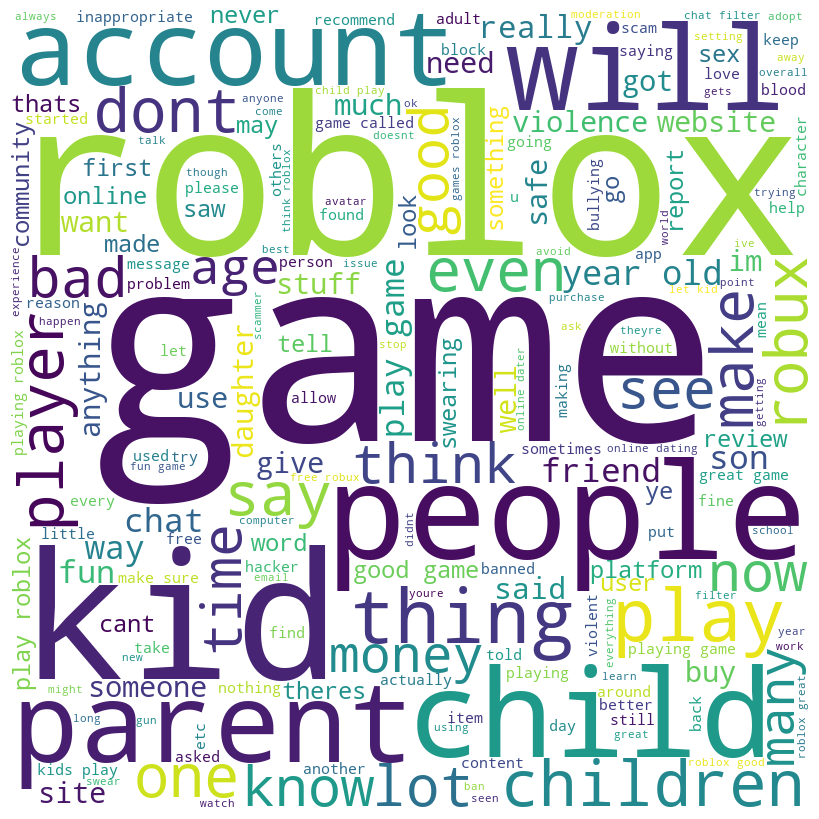

In [14]:
parent_wc = word_cloud(df[df['Author']=='adult']['Review'])
draw_word_cloud(parent_wc)

In [15]:
# print the top 50 most frequent words in the word cloud
print("Top 50 most frequent words from parent comments: ")
top_50_parent = pd.Series(parent_wc.split()).value_counts()[:50]
print(top_50_parent)

Top 50 most frequent words from parent comments: 
game             3012
roblox           2832
games            1742
kids             1164
play             1118
people            875
child             861
dont              684
robux             629
will              617
good              612
playing           555
account           530
make              516
bad               512
children          471
chat              462
kid               432
money             420
parents           411
think             399
even              397
fun               383
online            369
say               365
things            352
let               350
one               345
son               343
know              341
old               333
now               330
many              318
year              310
really            300
great             291
called            290
see               280
time              267
inappropriate     267
players           264
safe              262
want              261
much

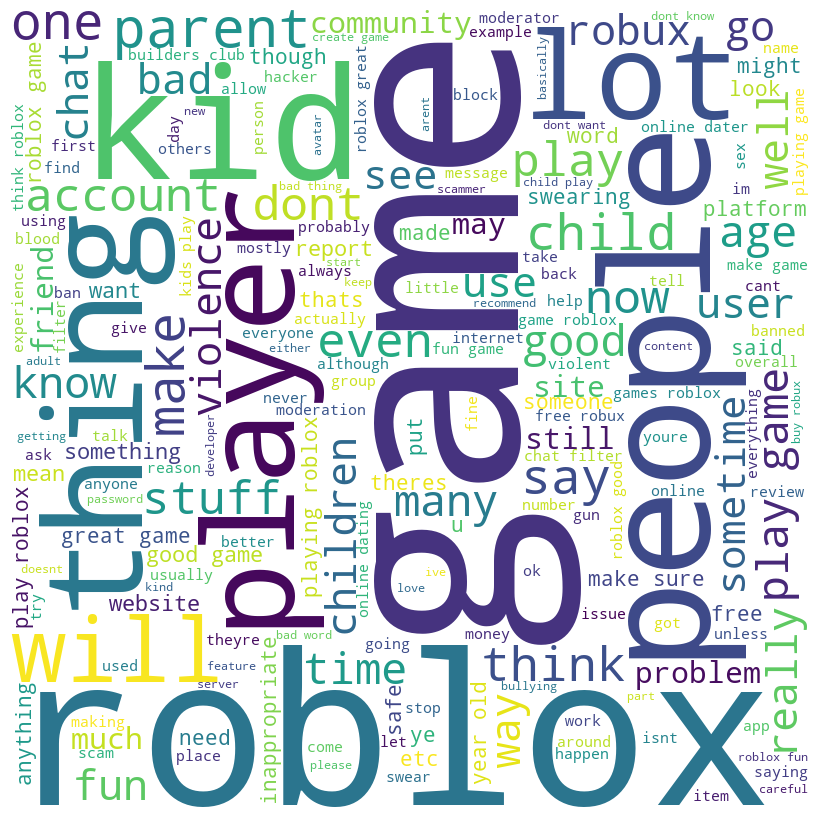

In [16]:
child_wc = word_cloud(df[df['Author']=='child']['Review'])
draw_word_cloud(child_wc)

In [17]:
# print the top 50 most frequent words in the word cloud
print("Top 50 most frequent words from child comments: ")
top_50_child = pd.Series(child_wc.split()).value_counts()[:50]
print(top_50_child)

Top 50 most frequent words from child comments: 
roblox           9401
game             8202
games            7006
people           3664
play             3117
kids             2906
dont             2415
robux            2311
child            2287
good             2043
make             2010
will             1979
bad              1895
chat             1694
things           1597
playing          1587
fun              1499
say              1493
think            1400
online           1334
really           1307
kid              1296
parents          1269
players          1249
even             1216
many             1193
great            1186
one              1115
know             1103
account          1094
now              1036
money            1030
stuff            1023
lot              1004
want              967
inappropriate     917
children          860
safe              860
much              852
see               846
time              833
buy               832
violence          799
years